# <span style="text-align：center;margin-left:30%"> 情感分类<span>

<h2>导入分类需要的包</h2>

In [234]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
import jieba
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,average_precision_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.externals import joblib
from sklearn.model_selection import GridSearchCV

<h3>加载停词</h3>

In [169]:
file = open("停用词.txt",encoding='utf8') 
stopword = [line.lstrip().rstrip() for line in file.readlines()]

<h3>读取训练数据</h3>

In [30]:
df = pd.read_excel('标注数据1万条.xlsx')

In [31]:
#<h3>读取训练数据</h3>
df.head()

,手机编号,评论得分,评论内容,文本长度,标注结果
0,2876449,1,手机的logo不好看，触屏不灵敏，流畅度还好，总体一般吧,28,0
1,2876449,1,在信号满格的情况下，能听到对方说话，对方听不到我说话，这样的也情况出现好多次了，已过7天，认...,50,0
2,2876449,1,电池耗电好快。。。而且刚买的手机还会卡，进软件还会闪退是什么鬼。。。,34,0
3,2876449,1,用了有半个月手机扬声器坏了去售后又换一个扬声器结果两天又坏了玩个回合游戏呢穿羽绒服的天气手机...,59,0
4,2876449,1,垃圾，从来没有买过这么垃圾的手机，一直在重启，根本用不了，我要投诉。,34,0


In [37]:
# y 数据
y = df.标注结果.values
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [211]:
set(y) #0，1分布的数据集

{0, 1}

In [41]:
x_sorce = df.评论内容.astype(str).values

In [45]:
contentlist = []
for j in x_sorce:
    content = ' '.join([word for word in jieba.cut(j) if word not in stopword])
    contentlist.append(content)

In [47]:
#词袋模型
counter = CountVectorizer()
counts = counter.fit_transform(contentlist)

In [138]:
#转为TFidf
tfidfer = TfidfTransformer()
#转为稀疏矩阵
x = tfidfer.fit_transform(counts)

In [200]:
#保存词处理模型模型
joblib.dump(counter,'co_model.m')
joblib.dump(tfidfer,'tf_model.m')

['tf_model.m']

In [139]:
#分为训练与测试样本
X_train, X_test, y_train, y_test =train_test_split(x,y)

In [226]:
#查看样本分布情况
(np.array(y_train)==1).sum()

3476

# 贝叶斯建模 指标

In [148]:
#朴素贝叶斯建模预测
bayes_clf = MultinomialNB(alpha=0.0001)
bayes_clf.fit(X_train,y_train)

MultinomialNB(alpha=0.0001, class_prior=None, fit_prior=True)

In [179]:
#训练集分数
bayes_clf.score(X_train,y_train)

0.9548030407740152

In [180]:
#测试集得分
bayes_clf.score(X_test,y_test)

0.8540630182421227

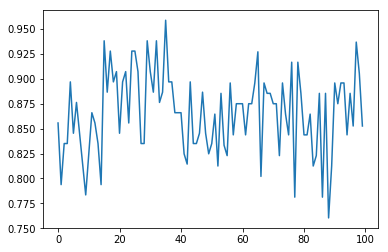

In [151]:
#100次交叉验证
nul = 100
scores = cross_val_score(bayes_clf, x, y, cv=nul)
plt.plot(range(nul), scores)
plt.show()

In [192]:
bayes_pred = bayes_clf.predict(X_test)
# 测试集精确度
accuracy_score(y_test, bayes_pred)

0.8540630182421227

In [193]:
#混淆矩阵
confusion_matrix(y_test, bayes_pred, labels=None, sample_weight=None)

array([[1026,  166],
       [ 186, 1034]], dtype=int64)

In [194]:
#fpr,
fpr, tpr, thresholds = metrics.roc_curve(y_test, bayes_pred, pos_label=1)
precision, recall, threshold = precision_recall_curve(y_test, bayes_pred)#精确度，召回率，阈值

In [414]:
precision

array([0.50580431, 0.86166667, 1.        ])

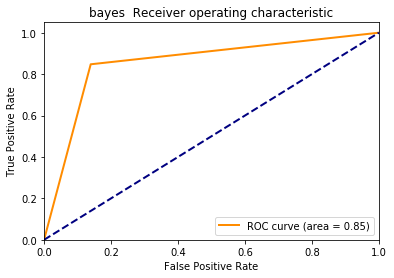

In [430]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % accuracy_score(y_test, bayes_pred))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('bayes  Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [197]:
#f1score
metrics.f1_score(y_test, bayes_pred)#发 score

0.8545454545454545

In [418]:
#precision_scor
metrics.precision_score(y_test, bayes_pred)

0.8616666666666667

In [420]:
metrics.recall_score(y_test, bayes_pred)

0.8475409836065574

In [198]:
metrics.auc(recall, precision)# auc面积 

0.8931610390669604

# SVM建模 指标

In [408]:
#核函数'linear','poly','rbf'
kernel = 'rbf'
svm_clf = svm.SVC(kernel =kernel, gamma=2,probability=True)

In [409]:
svm_clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf', max_iter=-1,
    probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [399]:
#svm 测试集得分

svm_clf.score(X_test,y_test)

0.8731343283582089

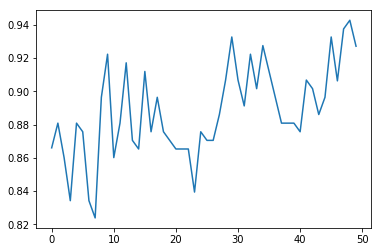

In [461]:
#20次交叉验证
nul = 50
scores = cross_val_score(svm_clf, x, y, cv=nul)
plt.plot(range(nul), scores)
plt.show()

In [424]:
svm_pred = svm_clf.predict(X_test)
# 测试集精确度
accuracy_score(y_test, svm_pred)

0.8731343283582089

In [442]:
#fpr,
fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_pred, pos_label=1)
precision, recall, threshold = precision_recall_curve(y_test, svm_pred)#精确度，召回率，阈值

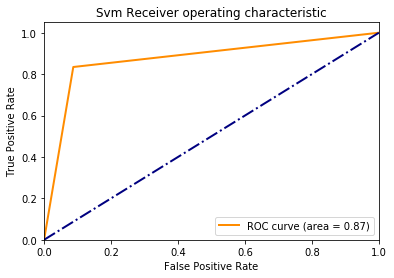

In [443]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % accuracy_score(y_test, svm_pred))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='-.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Svm Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [444]:
#f1score
metrics.f1_score(y_test, svm_pred)#发 score

0.8693424423569598

In [445]:
#precision_scor
metrics.precision_score(y_test, bayes_pred)

0.8616666666666667

In [446]:
#recall_score
metrics.recall_score(y_test, bayes_pred)

0.8475409836065574

In [447]:
#auc
metrics.auc(recall, precision)# auc面积 

0.9127412672181595

# LR建模，逻辑回归建模，指标

In [388]:
# 初始化LogisticRegression
lr_clf = LogisticRegression()
# 使用训练集对测试集进行训练
lr_clf.fit(X_train,y_train)
#lr 测试机分数
lr_clf.score(X_test,y_test)

e:\py355\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8830845771144279

In [263]:
#lr比较快，使用网格搜索，找一下参数
param_grid={'penalty':['l1','l2']}
param_grid={'solver':['newton-cg','lbfgs','liblinear','sag']}
grid_search = GridSearchCV(lr_clf, param_grid, n_jobs = 4, verbose = 2)

In [264]:
grid_search.fit(X_train,y_train)

e:\py355\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    5.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    5.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=4,
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [255]:
grid_search.best_score_

0.8833448514167243

In [247]:
grid_search.best_params_

{'solver': 'liblinear'}

e:\py355\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


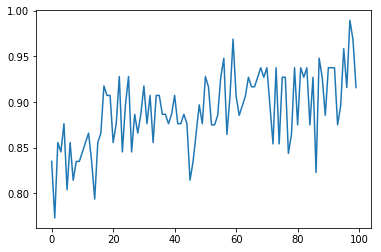

In [165]:
#100次交叉验证
nul = 100
scores = cross_val_score(lr_clf, x, y, cv=nul)
plt.plot(range(nul), scores)
plt.show()

In [175]:
#cr_pre = cross_val_predict(lr_clf, x, y, cv=nul)

e:\py355\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [439]:
lr_pred = lr_clf.predict(X_test)
# 测试集精确度
accuracy_score(y_test, lr_pred)

0.8830845771144279

In [448]:
#fpr,
fpr, tpr, thresholds = metrics.roc_curve(y_test, lr_pred, pos_label=1)
precision, recall, threshold = precision_recall_curve(y_test, lr_pred)#精确度，召回率，阈值

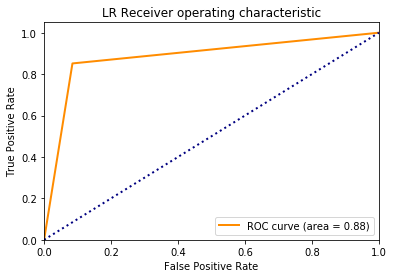

In [460]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % accuracy_score(y_test, lr_pred))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle=':')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [452]:
#f1score
metrics.f1_score(y_test, svm_pred)#发 score

0.8693424423569598

In [453]:
#precision_scor
metrics.precision_score(y_test, bayes_pred)

0.8616666666666667

In [454]:
#recall_score
metrics.recall_score(y_test, bayes_pred)

0.8475409836065574

In [455]:
#auc
metrics.auc(recall, precision)# auc面积 

0.9190421562020212

# 数据预测

In [84]:
df_prediect =  pd.read_excel('总数据.xlsx')

In [107]:
x_predsource = df_prediect.评论内容.astype(str).values

In [112]:
pre_list = []
for jj in x_predsource:     
    pre_content = ' '.join([str(word) for word in jieba.cut(jj) if word not in stopword])
    pre_list.append(pre_content)

In [141]:
pre_count=counter.transform(pre_list)
pre_tf_idf = tfidfer.transform(pre_count)

In [144]:
pre_tf_idf.shape

(246926, 13484)

# 贝叶斯预测

In [119]:
bayes = bayes_clf.predict(pre_tf_idf)

In [ ]:
df_prediect['bays'] = bayl

In [266]:
proba =bayes_clf.predict_proba(pre_tf_idf)

In [367]:
df_prediect['bays_概率']=np.array(proba)[:,[-1]]

In [422]:
#查看预测类的函数
dir(bayes_clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_check_alpha',
 '_count',
 '_estimator_type',
 '_get_coef',
 '_get_intercept',
 '_get_param_names',
 '_get_tags',
 '_joint_log_likelihood',
 '_more_tags',
 '_update_class_log_prior',
 '_update_feature_log_prob',
 'alpha',
 'class_count_',
 'class_log_prior_',
 'class_prior',
 'classes_',
 'coef_',
 'feature_count_',
 'feature_log_prob_',
 'fit',
 'fit_prior',
 'get_params',
 'intercept_',
 'partial_fit',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'score',
 'set_params']

In [182]:
#预测值的预测分数分布，前面是预测为0的概率，后面是预测为1的概率
bayes_clf.predict_proba(pre_tf_idf)

array([[3.18224244e-02, 9.68177576e-01],
       [8.01540715e-02, 9.19845928e-01],
       [2.62648201e-01, 7.37351799e-01],
       ...,
       [9.96601240e-01, 3.39875952e-03],
       [9.99965228e-01, 3.47717091e-05],
       [9.51626446e-01, 4.83735541e-02]])

# SVM预测

In [407]:
svm_pre = svm_clf.predict(pre_tf_idf)

In [405]:
df_prediect['svm_pre'] = svm_pre

In [415]:
svm_proba =svm_clf.predict_proba(pre_tf_idf)

In [416]:
df_prediect['svm_概率']=np.array(svm_proba)[:,[-1]]

In [423]:
dir(svm_clf)
svm_proba

array([[0.00428307, 0.99571693],
       [0.04384434, 0.95615566],
       [0.04615493, 0.95384507],
       ...,
       [0.84235062, 0.15764938],
       [0.93230322, 0.06769678],
       [0.73206217, 0.26793783]])

# LR预测

In [389]:
lr_pre = lr_clf.predict(pre_tf_idf)

In [390]:
df_prediect['lr_pre'] = lr_pre

In [393]:
lr_proba =lr_clf.predict_proba(pre_tf_idf)
df_prediect['lr_概率']=np.array(lr_proba)[:,[-1]]

In [421]:
df_prediect.to_csv('总数据.csv',encoding='utf8')

In [417]:
df_prediect.head(20)

,序号,手机编号,评论得分,评论内容,文本长度,标注结果,bays,svm_pre,lr_pre,f,svm_f,lr_f
0,1,2876449,5,给老爸买的 他非常喜欢 支持支持支持 下次还要买,24.0,NaN,1,1,1,0.968178,0.995717,0.963694
1,2,2876449,5,还可以运行什么的挺快的屏幕也舒服,16.0,NaN,1,1,1,0.919846,0.956156,0.825301
2,3,2876449,5,还不错，我帮别人买的，应该还好用吧,17.0,NaN,1,1,1,0.737352,0.953845,0.844668
3,4,2876449,5,物流是很快，就是不知道手机好不好用啊,18.0,NaN,1,1,1,0.727794,0.938133,0.854073
4,5,2876449,5,不错，感觉很好，暂时没发现什么缺点。,18.0,NaN,1,1,1,0.825040,0.999982,0.919260
5,6,2876449,5,感觉还不错，音质一般吧，不过真的很划算,19.0,NaN,1,1,1,0.965146,0.996982,0.966204
6,7,2876449,5,很好看很好用,6.0,NaN,1,1,1,0.900043,0.993885,0.910745
7,8,2876449,5,手机用着还可以，很值,10.0,NaN,1,1,0,0.999953,0.668955,0.436007
8,9,2876449,5,非常不错的一款手机,9.0,NaN,1,1,1,0.947978,0.999987,0.963934
9,10,2876449,5,好悲剧啊，贴膜失败，手机蛮好的。一是发货快，二是货源还算充足，三是自己呆了，买了套装，就裸机...,101.0,NaN,0,1,1,0.002030,0.672159,0.696147


In [462]:
svm_clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf', max_iter=-1,
    probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)